In [1]:
import torch
from torch.autograd import Variable
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./unet/src/')
from unet import get_unet
from dataset import normalizer
%matplotlib inline

In [2]:
model = get_unet(False).cuda()

In [3]:
model.load_state_dict(torch.load('./unet/output_1/model_best.pt'))

In [4]:
model.eval()

UNet (
  (encoder_blocks): ModuleList (
    (0): Sequential (
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (2): ReLU (inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (5): ReLU (inplace)
    )
    (1): Sequential (
      (6): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
      (9): ReLU (inplace)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
      (12): ReLU (inplace)
    )
    (2): Sequential (
      (13): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
      (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [9]:
data_dir = './test_persons/img/'
SIZE = 256
images = []
gts = []

In [10]:
for img_path in os.listdir(data_dir):
    image = cv2.imread(os.path.join(data_dir, img_path))
    
    image = cv2.resize(image, (256, 256))
    images.append(image)
    image = normalizer(image)
    image = Variable(image.unsqueeze_(0).cuda(), volatile = True)
    gt = model(image)
    gt = gt.data.cpu().numpy()[0][0]
    print(gt.shape)
    
    gts.append(gt)
    #plt.imshow(image)
    #plt.imshow(gt, alpha = 0.5)
    #plt.show()

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


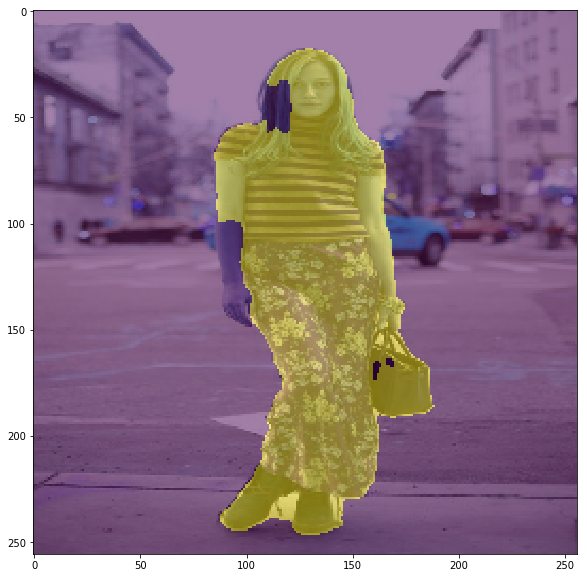

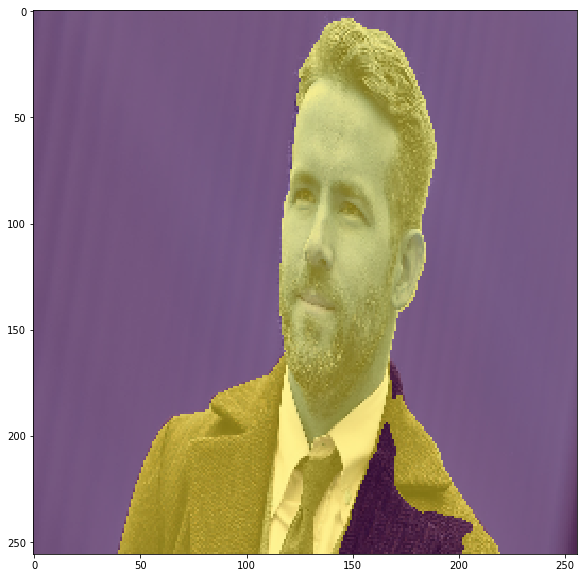

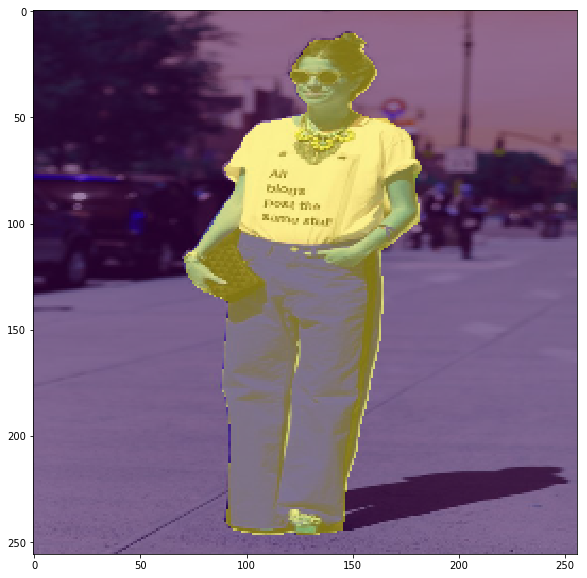

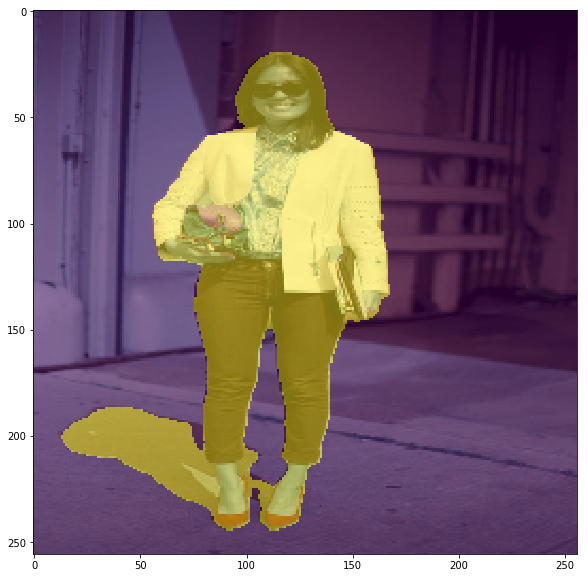

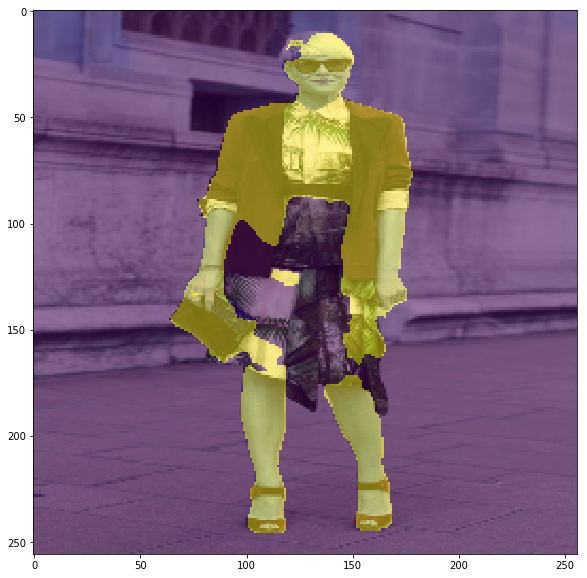

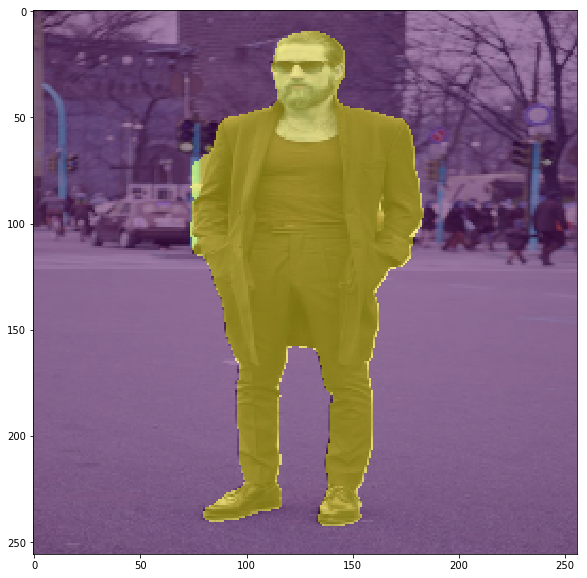

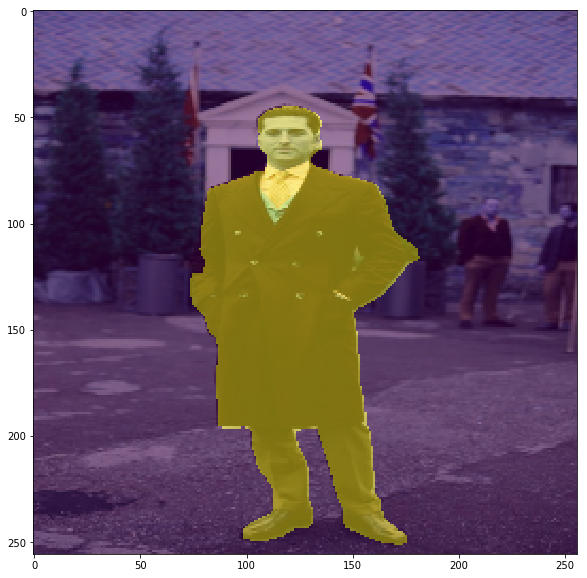

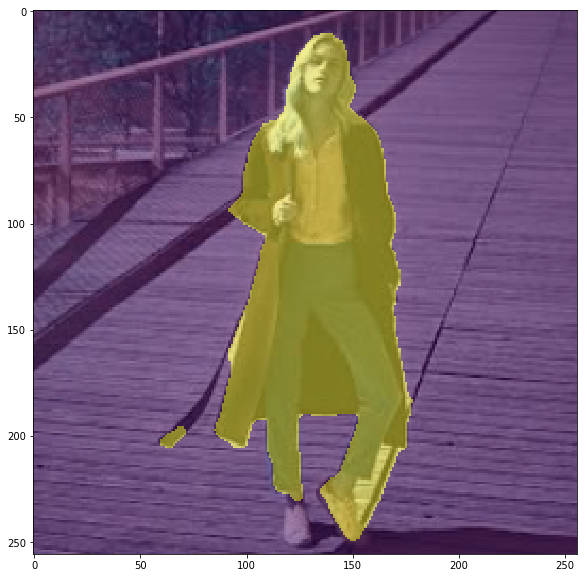

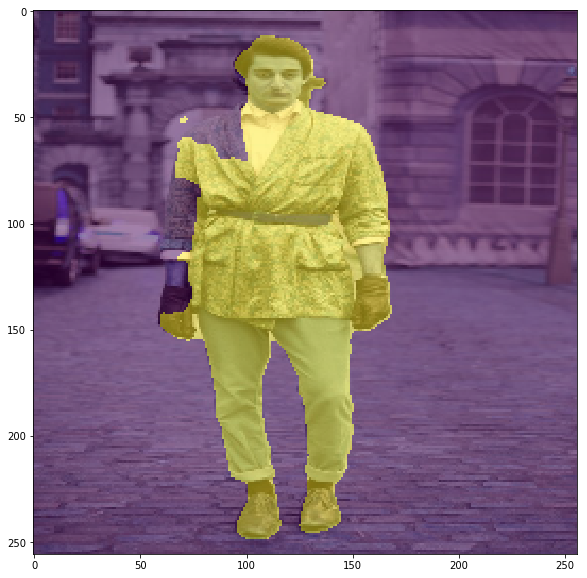

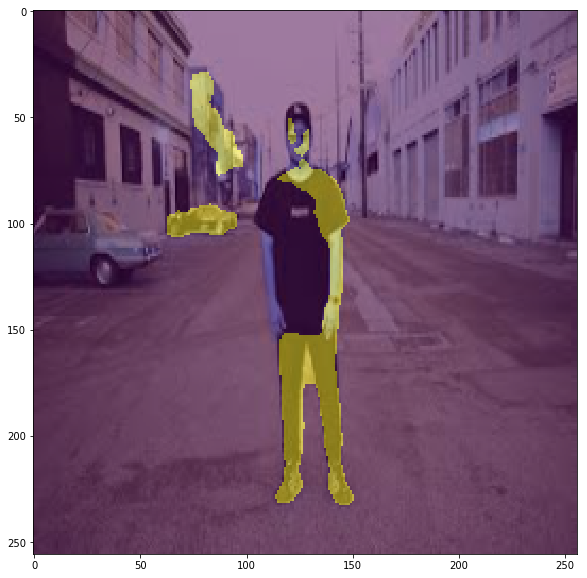

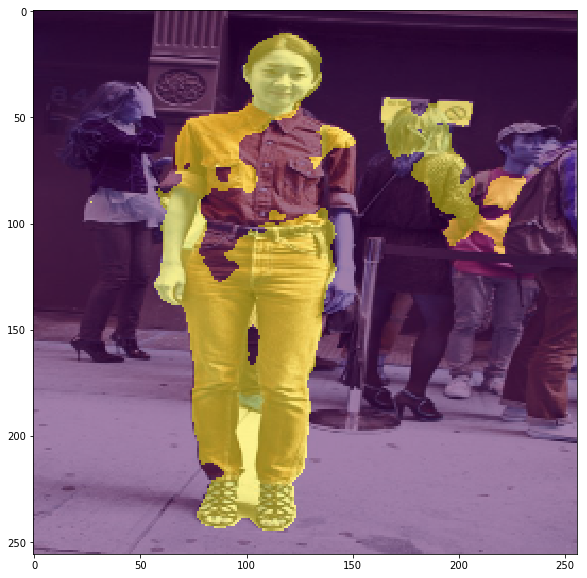

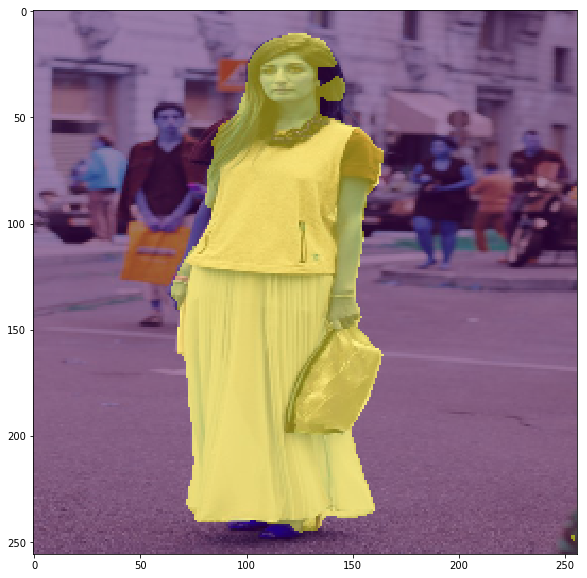

In [12]:
for image, gt in zip(images, gts):
    plt.figure(figsize = (10,10))
    plt.imshow(image)
    gt[gt > 0.5]  = 1
    gt[gt <0.5] = 0
    plt.imshow(gt, alpha = 0.5)
    plt.show()

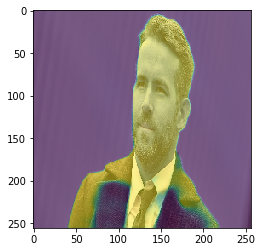

In [9]:
plt.imshow(images[0])
plt.imshow(gts[0], alpha = 0.5)
plt.show()

In [ ]:
for image, gt in zip(images, gts):
    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax2.imshow(gt)
    plt.show()